   Parameter  R2 Score           MSE
0        NH4  0.654850      1.386114
1       BSK5  0.073439      6.082487
2  Suspended -0.046674    129.251365
3         O2  0.335180      9.805896
4        NO3  0.327951     26.605116
5        NO2 -1.664663      0.465539
6        SO4  0.731838   1105.909992
7        PO4  0.222467      0.336155
8         CL  0.752822  32632.620277


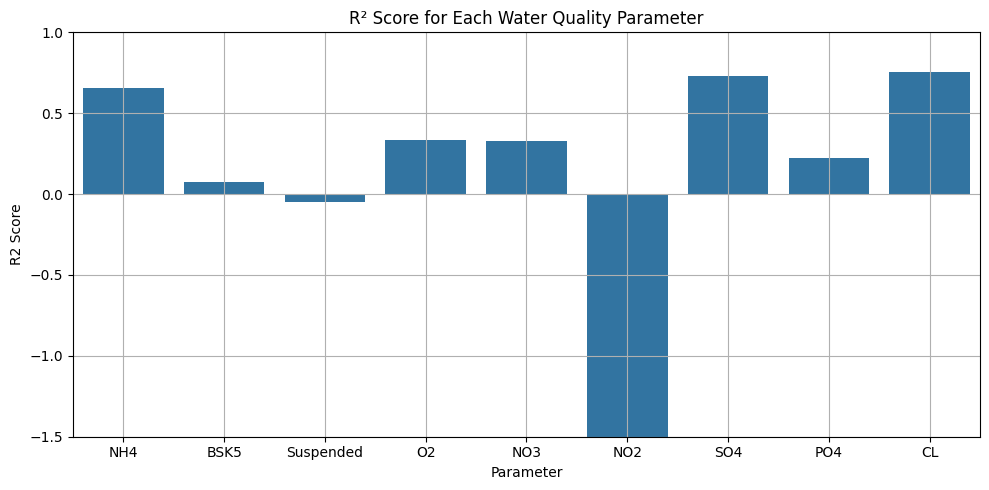

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error

df_raw = pd.read_csv('water.csv')
df = df_raw.iloc[:, 0].str.split(";", expand=True)
df.columns = ['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df_clean = df.dropna().reset_index(drop=True)

X = pd.DataFrame({'index': range(len(df_clean))})
y = df_clean[['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
results = pd.DataFrame({'Parameter': y.columns, 'R2 Score': r2, 'MSE': mse})
print(results)

plt.figure(figsize=(10, 5))
sns.barplot(x='Parameter', y='R2 Score', data=results)
plt.title("R² Score for Each Water Quality Parameter")
plt.ylim(-1.5, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()
